**Описание используемого набора данных**

Набор данных о расходе топлива разными автомобилями в сша в 1993 году. Он включает в себя следующие признаки:

*   mpg: расход топлива (мили на галлон)
*   cylinders: количество цилиндров
*   displacement: объем двигателя
*   horsepower: мощность двигателя
*   weight: вес автомобиля
*   acceleration: время разгона от 0 до 60 миль/час
*   model_year: год выпуска модели
*   origin: происхождение автомобиля (1: США, 2: Европа, 3: Япония)
*   name: имя модели автомобиля

Набор данных содержит информацию о 398 записей.

Источник данных:
auto-mpg dataset
(https://www.kaggle.com/datasets/uciml/autompg-dataset)



*   Решаемая задача: Построение модели регрессии для прогнозирования расхода топлива на основе различных характеристик авто.

*   Целевая переменная для задачи регрессии: расход топлива (mpg)



**Подключение библиотек**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor

**Загрука данных**

In [2]:
data = pd.read_csv('auto-mpg.csv')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


**Статистическая информация (для количественных данных)**

In [3]:
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


**Пропущенные значения**

In [4]:
data.replace('?', np.nan, inplace=True)
numeric_columns = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'mpg']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric)
missing_values = data.isnull().sum()
print("Пропущенные значения в данных:")
print(missing_values)

Пропущенные значения в данных:
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


**Удаление пропущенных значений**


In [5]:
data = data.dropna()

**Заменить категориальные данные количественными**

In [6]:
# Удаление столбца 'name', так как он не несет полезной информации для модели
data_num = data.drop('car name', axis=1)
data_num.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


**Выбрать важные признаки с помощью корреляционного анализа**

In [7]:
correlation_matrix = data_num.corr()
correlation_matrix

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
model year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


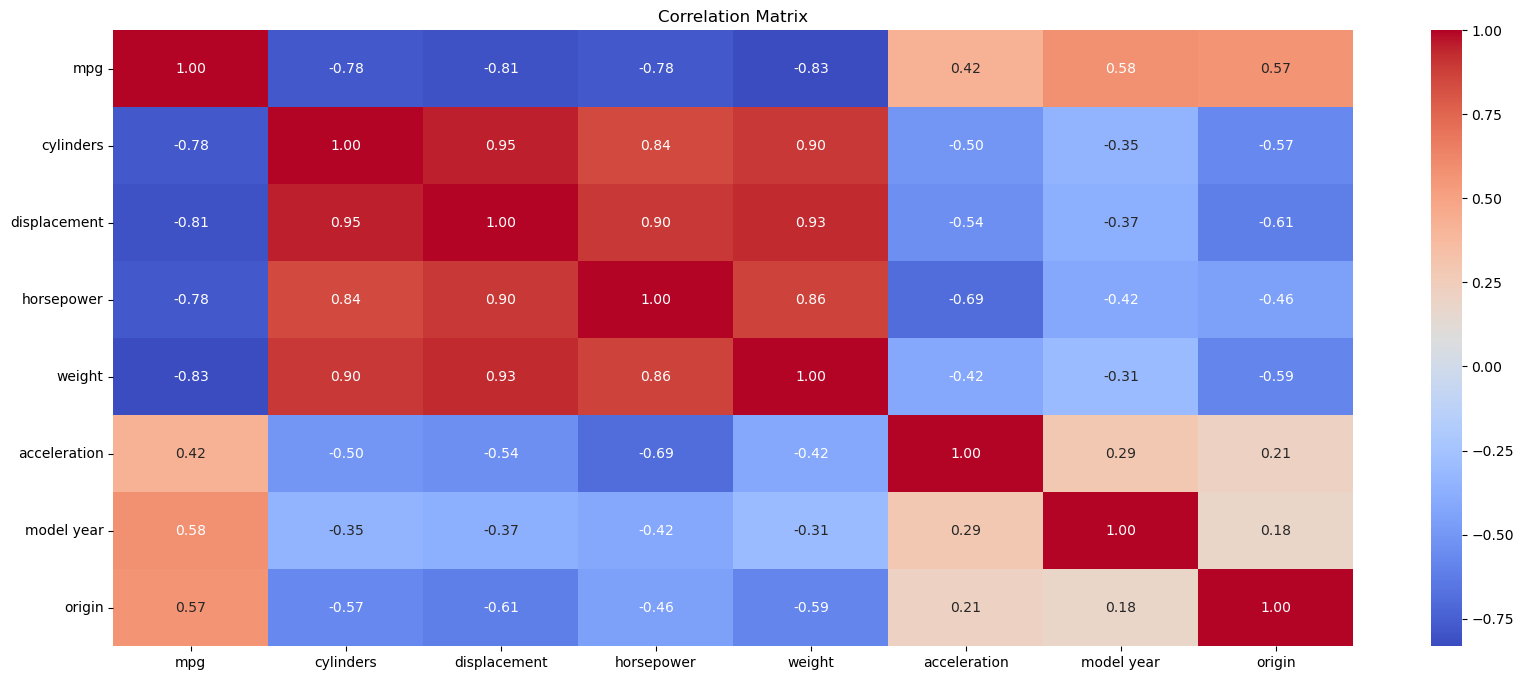

In [8]:
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, fmt='.2f', annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Расход топлива коррелирует со всеми параметрами, но сильнее всего с весом автомобиля и объёмом двигателя

**Конструирование признаков**

Признак 'horsepower_per_weight' представляет собой отношений мощности двигателя к весу автомобиля, который может выступать как удельная мощность автомобиля, что тоже может влиять на расход

In [9]:
data_num['horsepower_per_weight'] = data_num['horsepower'] / data_num['weight']

Признак 'displacement_per_cylinder' представляет собой отношение объёма двигателя к количечеству целиндров, который может свидетельствовать о объёме каждого целиндра, что может отразиться на расходе топлива.

In [10]:
data_num['displacement_per_cylinder'] = data_num['displacement'] / data_num['cylinders']

Признак 'car_age' представляет собой возраст автомобиля, в качестве текущего года указан 1993, так как данные собирались в нем, может влиять на расход топлива(новые технологии, ограничения в закнодательстве в разные периоды).

In [11]:
current_year = 1993
data_num['car_age'] = current_year - (1900 + data_num['model year'])

In [12]:
data_num.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,horsepower_per_weight,displacement_per_cylinder,car_age
0,18.0,8,307.0,130.0,3504,12.0,70,1,0.037100,38.375,23
1,15.0,8,350.0,165.0,3693,11.5,70,1,0.044679,43.750,23
2,18.0,8,318.0,150.0,3436,11.0,70,1,0.043655,39.750,23
3,16.0,8,304.0,150.0,3433,12.0,70,1,0.043694,38.000,23
4,17.0,8,302.0,140.0,3449,10.5,70,1,0.040591,37.750,23


In [13]:
correlation_matrix_after = data_num.corr()
correlation_matrix_after

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,horsepower_per_weight,displacement_per_cylinder,car_age
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209,-0.269699,-0.772536,-0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932,0.261069,0.777247,0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535,0.301134,0.921289,0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171,0.611764,0.813038,0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005,0.149154,0.873676,0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746,-0.735066,-0.475732,-0.290316
model year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528,-0.346702,-0.307984,-1.000000
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000,0.019217,-0.662411,-0.181528
horsepower_per_weight,-0.269699,0.261069,0.301134,0.611764,0.149154,-0.735066,-0.346702,0.019217,1.000000,0.234608,0.346702
displacement_per_cylinder,-0.772536,0.777247,0.921289,0.813038,0.873676,-0.475732,-0.307984,-0.662411,0.234608,1.000000,0.307984


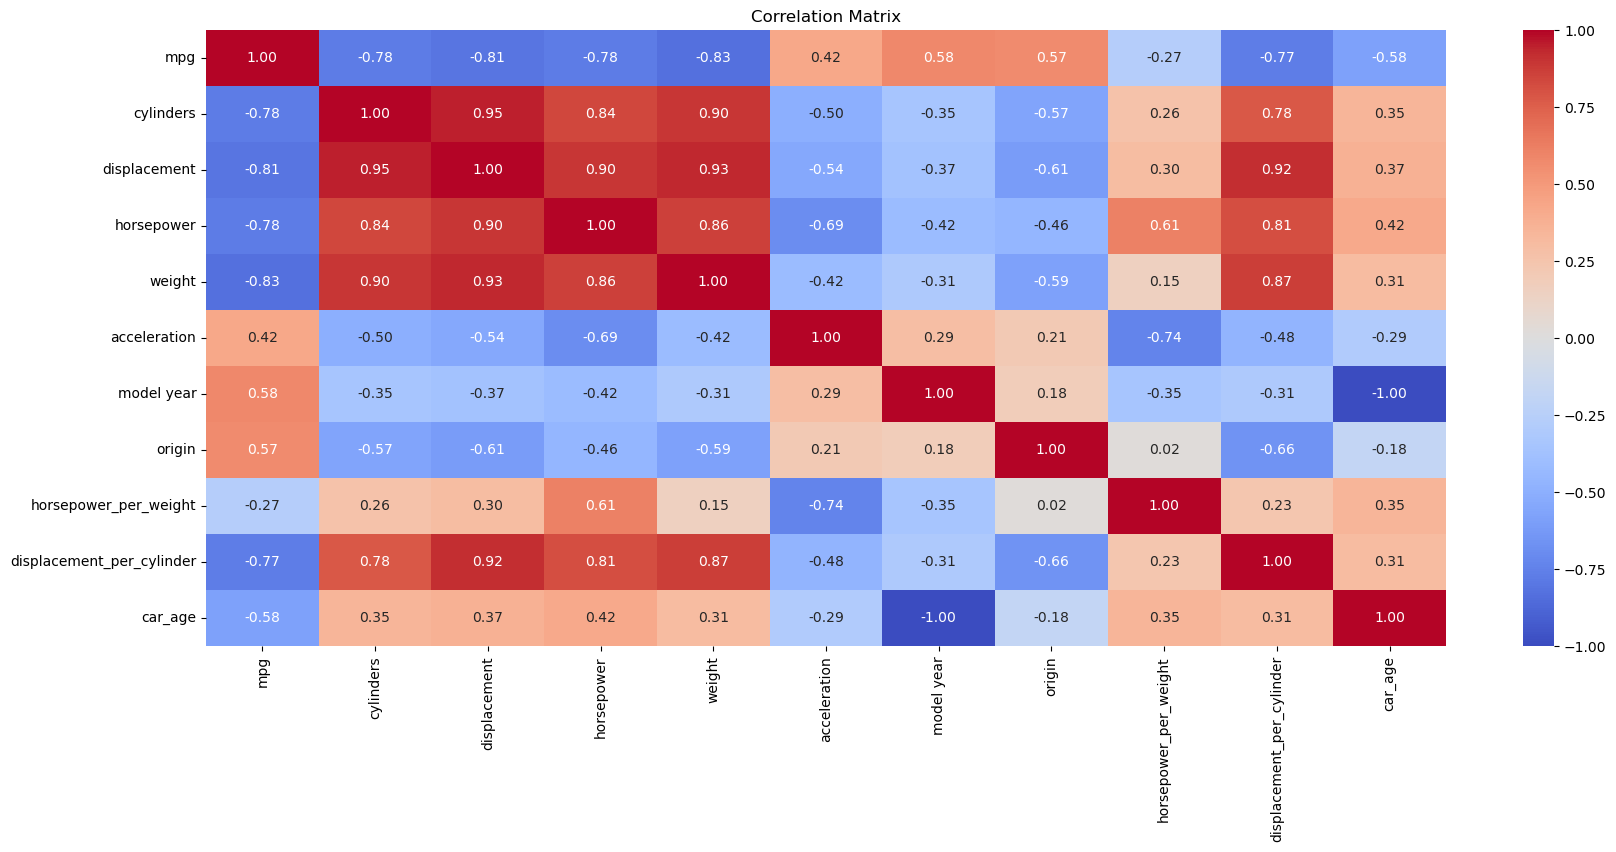

In [14]:
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix_after, fmt='.2f', annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

После введения признаков, наблюдаем их высокие корреляции с целевой переменной

**Визуализация**

In [15]:
data_num

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,horsepower_per_weight,displacement_per_cylinder,car_age
0,18.0,8,307.0,130.0,3504,12.0,70,1,0.037100,38.375,23
1,15.0,8,350.0,165.0,3693,11.5,70,1,0.044679,43.750,23
2,18.0,8,318.0,150.0,3436,11.0,70,1,0.043655,39.750,23
3,16.0,8,304.0,150.0,3433,12.0,70,1,0.043694,38.000,23
4,17.0,8,302.0,140.0,3449,10.5,70,1,0.040591,37.750,23
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,0.030824,35.000,11
394,44.0,4,97.0,52.0,2130,24.6,82,2,0.024413,24.250,11
395,32.0,4,135.0,84.0,2295,11.6,82,1,0.036601,33.750,11
396,28.0,4,120.0,79.0,2625,18.6,82,1,0.030095,30.000,11


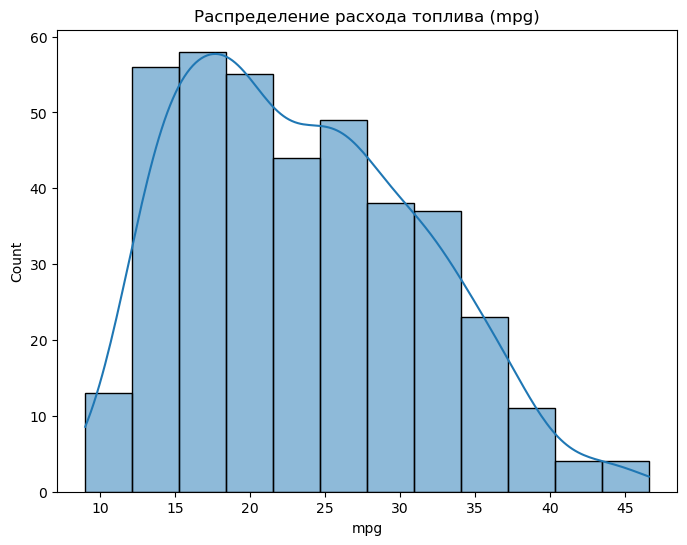

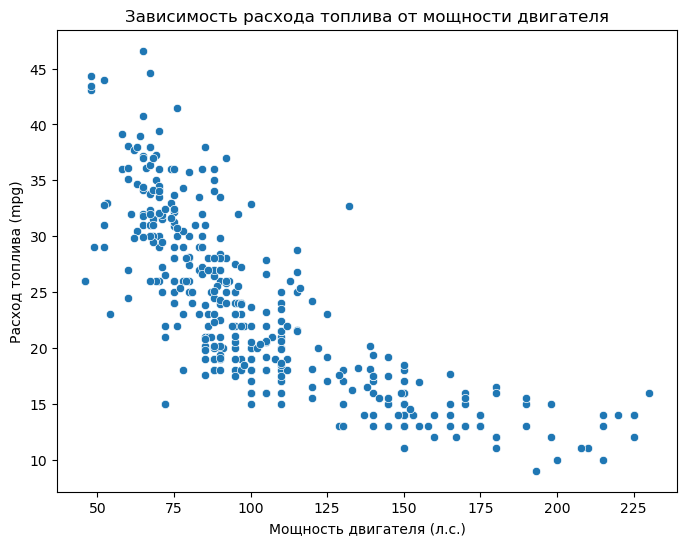

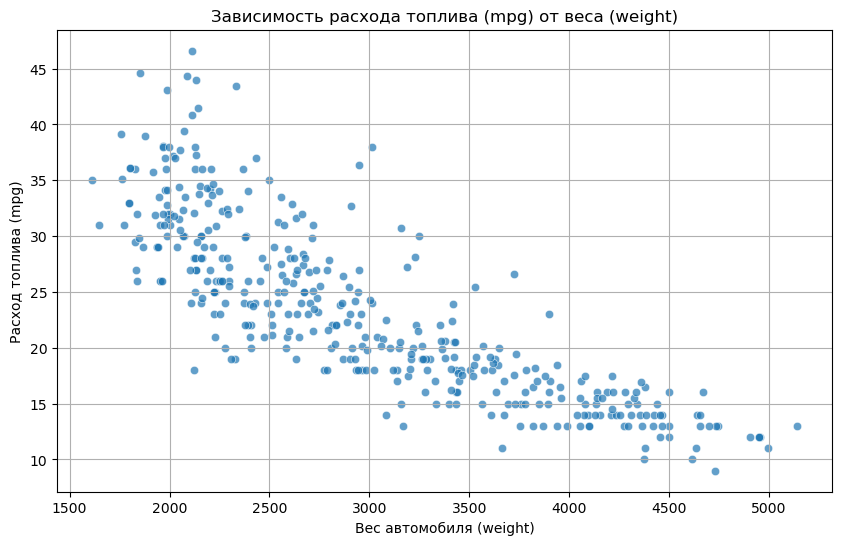

In [16]:
# Визуализация распределения целевой переменной
plt.figure(figsize=(8, 6))
sns.histplot(data_num['mpg'], kde=True)
plt.title('Распределение расхода топлива (mpg)')
plt.show()

# Визуализация зависимости расхода топлива от мощности двигателя
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_num['horsepower'], y=data_num['mpg'])
plt.title('Зависимость расхода топлива от мощности двигателя')
plt.xlabel('Мощность двигателя (л.с.)')
plt.ylabel('Расход топлива (mpg)')
plt.show()

# Визуализация зависимости расхода топлива от веса
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_num['weight'], y=data_num['mpg'], alpha=0.7)
plt.title('Зависимость расхода топлива (mpg) от веса (weight)')
plt.xlabel('Вес автомобиля (weight)')
plt.ylabel('Расход топлива (mpg)')
plt.grid(True)
plt.show()

**Выбор метрик**


*   Среднеквадратичная ошибка (Mean Squared Error, MSE): измеряет среднеквадратичное отклонение между фактическими и предсказанными значениями. MSE увеличивает вес больших ошибок, что может быть полезно в задачах, где большие ошибки важнее, чем маленькие.
*   Корень из среднеквадратичной ошибки (Root Mean Squared Error, RMSE): измеряет среднеквадратичное отклонение между фактическими и предсказанными значениями в тех же единицах.
*   Коэффициент детерминации (Coefficient of Determination, R^2): измеряет долю дисперсии зависимой переменной, которая объясняется моделью. Он предоставляет информацию о том, насколько хорошо модель соответствует данным.






**Построить модели и обучить их**

In [17]:
X = data_num.drop(columns='mpg')
y = data_num['mpg']

Линейная регрессия

In [18]:
reg_model_1 = LinearRegression()
reg_model_1.fit(X, y)
y_pred_1 = reg_model_1.predict(X)

mse_1 = mean_squared_error(y, y_pred_1)
rmse_1 = np.sqrt(mse_1)
r2_1 = r2_score(y, y_pred_1)
print(f"MSE: {mse_1:.7f}")
print(f"RMSE: {rmse_1:.7f}")
print(f"R^2: {r2_1:.7f}")

MSE: 8.8363892
RMSE: 2.9726065
R^2: 0.8545755


In [19]:
X_with_ones = X.copy()
X_with_ones["Intersection"] = np.ones(len(data_num))
reg_model_2_with_ones = sm.OLS(y, X_with_ones)
reg_results_2_with_ones = reg_model_2_with_ones.fit()
print(reg_results_2_with_ones.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     249.4
Date:                Tue, 15 Oct 2024   Prob (F-statistic):          5.78e-154
Time:                        17:53:13   Log-Likelihood:                -983.28
No. Observations:                 392   AIC:                             1987.
Df Residuals:                     382   BIC:                             2026.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
cylinders             

Линейная регрессия без пересечения

In [20]:
reg_model_3 = sm.OLS(y, X)
reg_results_3 = reg_model_3.fit()
print(reg_results_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     249.4
Date:                Tue, 15 Oct 2024   Prob (F-statistic):          5.78e-154
Time:                        17:53:13   Log-Likelihood:                -983.28
No. Observations:                 392   AIC:                             1987.
Df Residuals:                     382   BIC:                             2026.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
cylinders             

Дерево решений

In [21]:
# Параметры для перебора
tree_param = [{'max_depth': range(1, 5),
               'min_samples_leaf': range(1, 5)}]

# Создание и обучение модели с использованием GridSearchCV
dtr_model = GridSearchCV(DecisionTreeRegressor(), tree_param, cv=5)
dtr_model.fit(X, y)

# Получение лучшей модели и прогнозов
best_model = dtr_model.best_estimator_
prediction_reg = best_model.predict(X)

mse_reg = mean_squared_error(prediction_reg, y)
rmse_reg = np.sqrt(mse_reg)
r2_reg = best_model.score(X, y)

print(f"MSE: {mse_reg:.7f}")
print(f"RMSE: {rmse_reg:.7f}")
print(f"R^2: {r2_reg:.7f}")

MSE: 6.4759601
RMSE: 2.5447908
R^2: 0.8934222


[Text(0.5, 0.9, 'x[1] <= 190.5\nsquared_error = 60.763\nsamples = 392\nvalue = 23.446'),
 Text(0.25, 0.7, 'x[2] <= 70.5\nsquared_error = 35.072\nsamples = 222\nvalue = 28.642'),
 Text(0.125, 0.5, 'x[9] <= 15.5\nsquared_error = 25.405\nsamples = 71\nvalue = 33.666'),
 Text(0.0625, 0.3, 'x[2] <= 50.0\nsquared_error = 18.941\nsamples = 43\nvalue = 36.216'),
 Text(0.03125, 0.1, 'squared_error = 0.26\nsamples = 3\nvalue = 43.6'),
 Text(0.09375, 0.1, 'squared_error = 15.947\nsamples = 40\nvalue = 35.662'),
 Text(0.1875, 0.3, 'x[6] <= 2.5\nsquared_error = 10.009\nsamples = 28\nvalue = 29.75'),
 Text(0.15625, 0.1, 'squared_error = 9.094\nsamples = 16\nvalue = 28.0'),
 Text(0.21875, 0.1, 'squared_error = 1.701\nsamples = 12\nvalue = 32.083'),
 Text(0.375, 0.5, 'x[9] <= 14.5\nsquared_error = 22.169\nsamples = 151\nvalue = 26.28'),
 Text(0.3125, 0.3, 'x[3] <= 2580.0\nsquared_error = 16.908\nsamples = 57\nvalue = 29.842'),
 Text(0.28125, 0.1, 'squared_error = 12.26\nsamples = 24\nvalue = 33.117'),

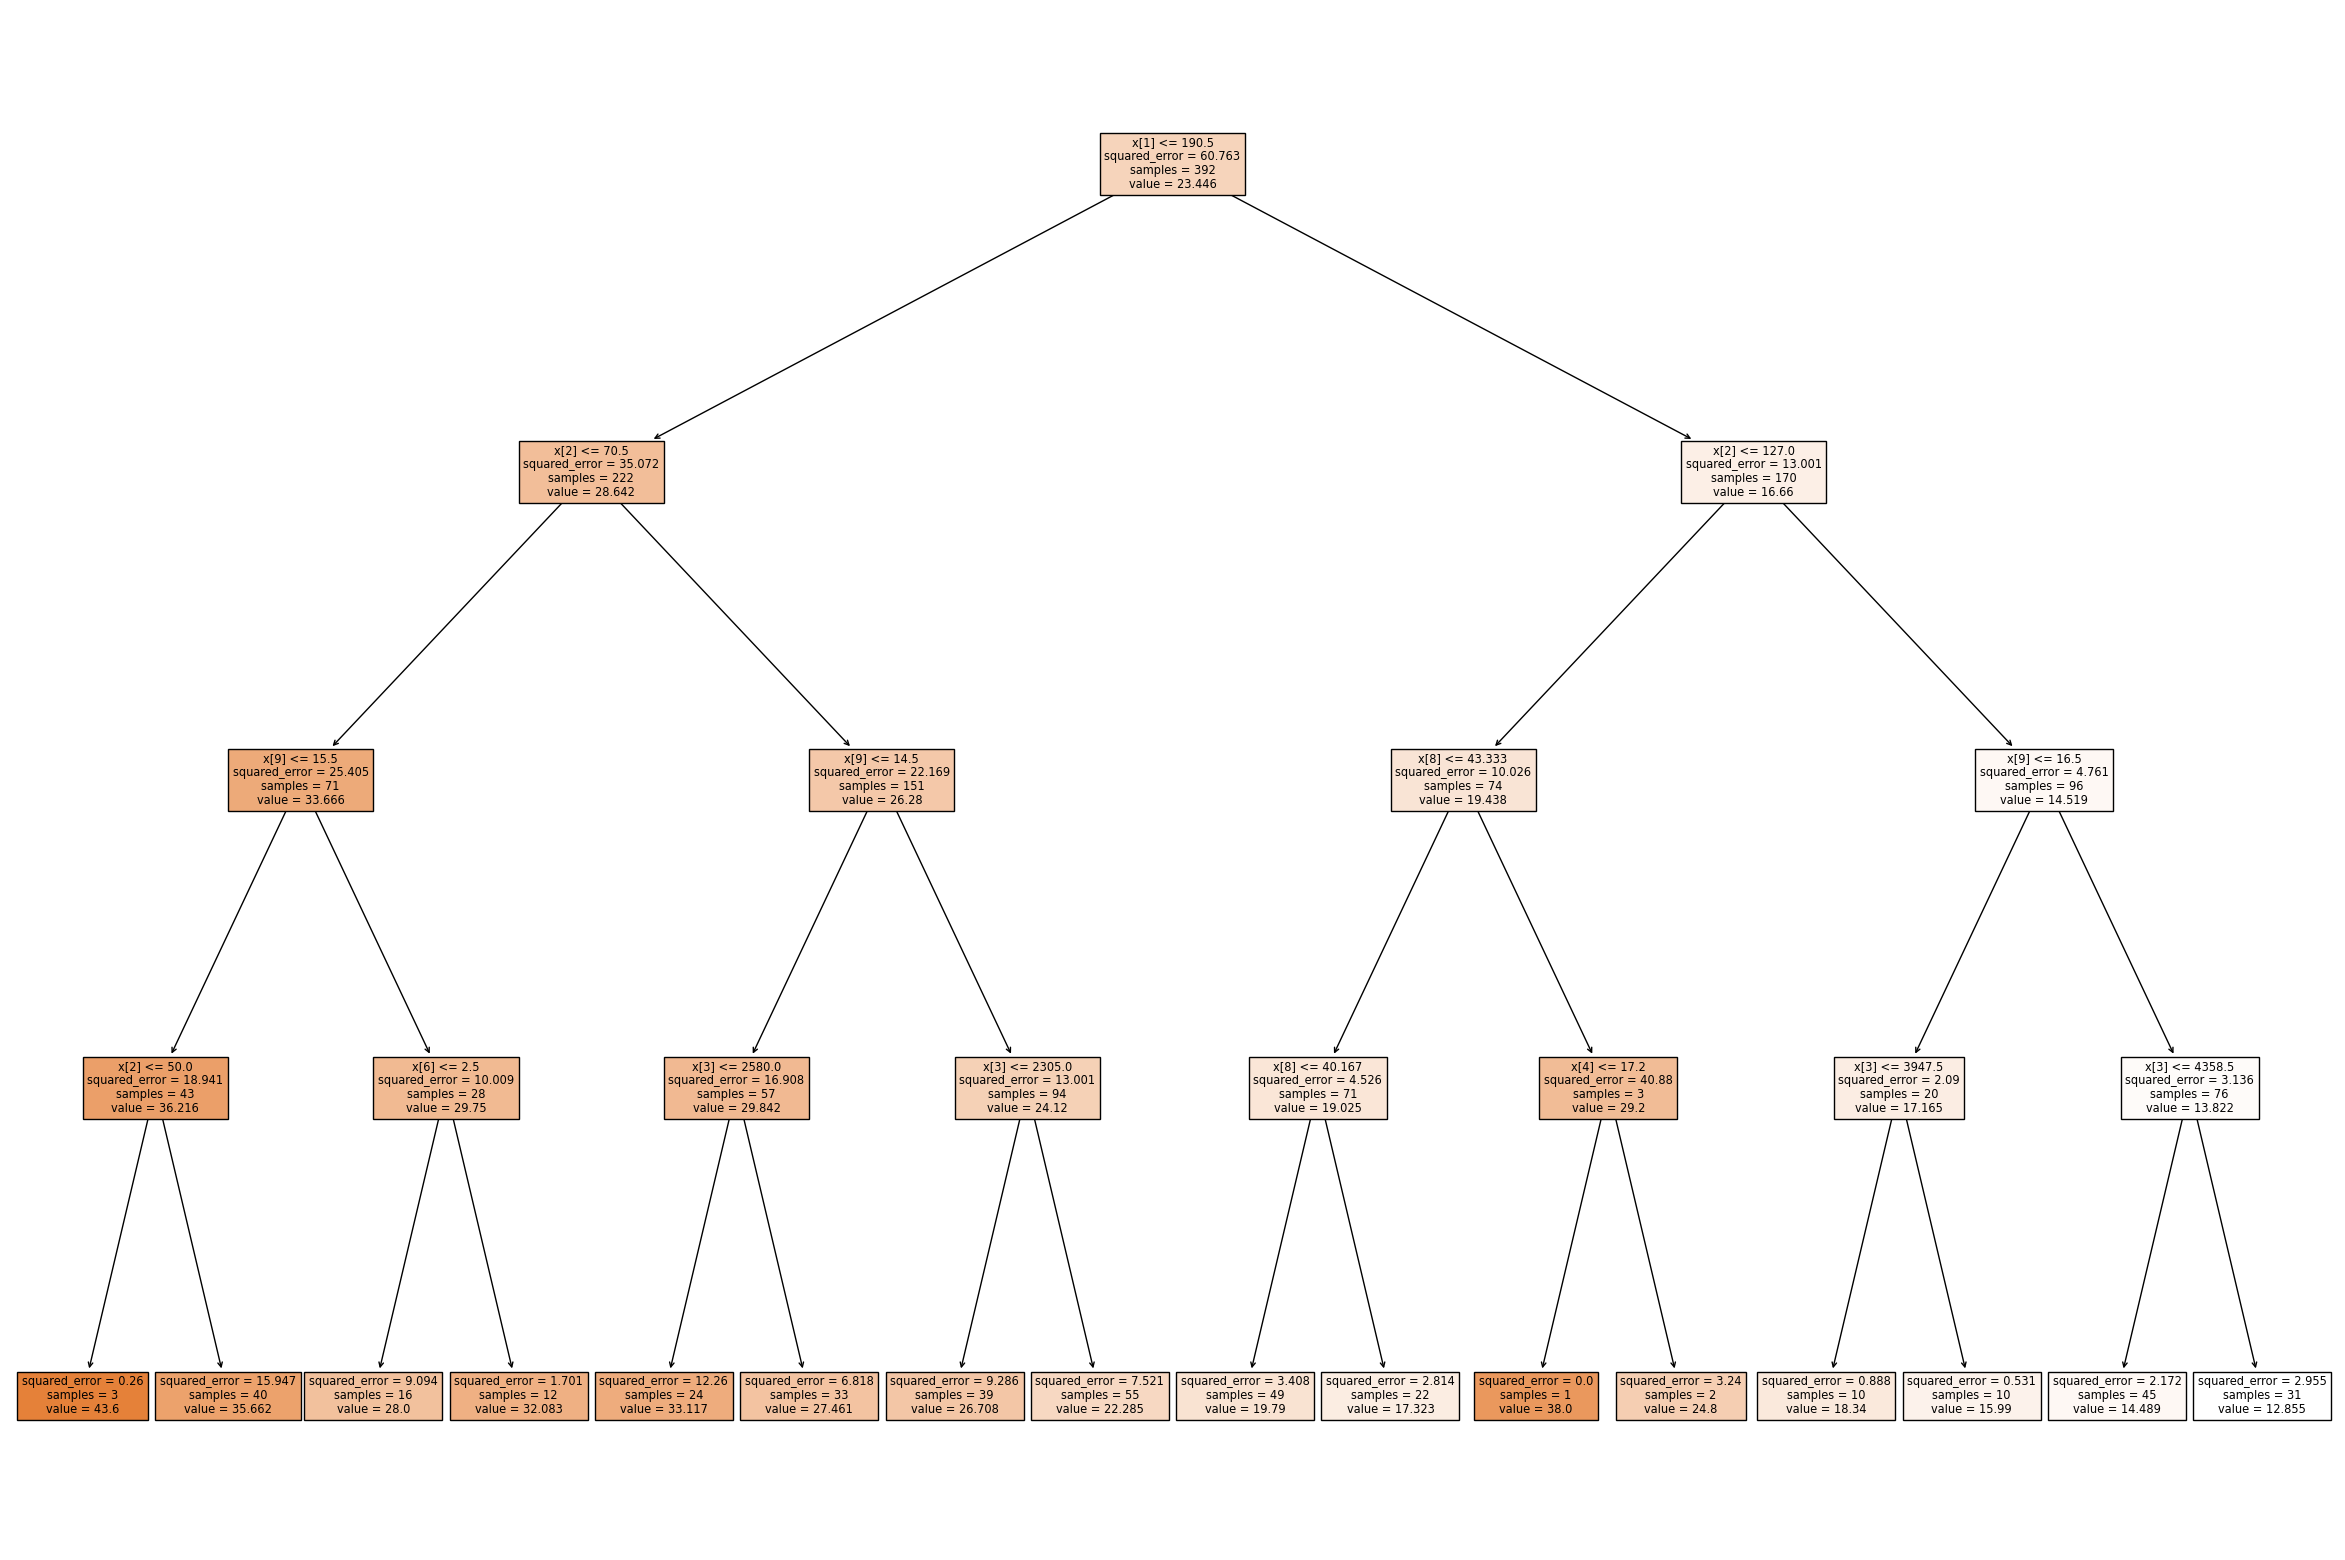

In [22]:
plt.figure(figsize=(30,20))
plot_tree(dtr_model.best_estimator_, filled=True, impurity=True)

KNN

In [23]:
param_grid = {'n_neighbors': range(3, 21)}
knn_model = KNeighborsRegressor()

grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(X, y)
print("Наилучшие параметры:", grid_search.best_params_)

knn_pred = grid_search.best_estimator_.predict(X)
mse_reg = mean_squared_error(y, knn_pred)
rmse_reg = np.sqrt(mse_reg)
r2_reg = r2_score(y, knn_pred)

print(f"MSE: {mse_reg:.3f}")
print(f"RMSE: {rmse_reg:.3f}")
print(f"R^2: {r2_reg:.3f}")

Наилучшие параметры: {'n_neighbors': 7}
MSE: 12.174
RMSE: 3.489
R^2: 0.800


Ridge

In [24]:

# Ridge - квадрат веса
# укажем параметры регуляризации alpha, которые хотим протестировать
# дополнительно укажем количество частей (folds), параметр cv,
# на которое нужно разбить данные при оценке качества модели
ridge_cv = RidgeCV(alphas=[1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20], cv=5)
ridge_cv.fit(X, y)
y_pred = ridge_cv.predict(X)


mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)


print("Лучшее значение alpha:", ridge_cv.alpha_)
print(f"MSE: {mse:.7f}")
print(f"RMSE: {rmse:.7f}")
print(f"R^2: {r2:.7f}")

coefficients = pd.DataFrame(ridge_cv.coef_, index=X.columns, columns=['Coefficients'])
print(coefficients)

Лучшее значение alpha: 1e-08
MSE: 8.8363892
RMSE: 2.9726065
R^2: 0.8545755
                           Coefficients
cylinders                     -4.324136
displacement                   0.121151
horsepower                     0.075183
weight                        -0.008487
acceleration                  -0.108293
model year                     0.383622
origin                         0.537199
horsepower_per_weight       -409.000524
displacement_per_cylinder     -0.740333
car_age                       -0.384193


C:\Users\tchag\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.79653e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\tchag\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.24898e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\tchag\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=4.34657e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\tchag\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=4.10274e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\tchag\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:21

Lasso

In [25]:
# Lasso - модуль веса
lasso = LassoCV(alphas = [1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20], cv = 5)
lasso.fit(X, y)

y_pred = lasso.predict(X)

mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)


print("Лучшее значение alpha:", lasso.alpha_)
print(f"MSE: {mse:.7f}")
print(f"RMSE: {rmse:.7f}")
print(f"R^2: {r2:.7f}")

coefficients = pd.DataFrame(lasso.coef_, index=X.columns, columns=['Coefficients'])
print(coefficients)

Лучшее значение alpha: 1e-08
MSE: 8.8363893
RMSE: 2.9726065
R^2: 0.8545755
                           Coefficients
cylinders                     -4.322738
displacement                   0.121114
horsepower                     0.075256
weight                        -0.008490
acceleration                  -0.108314
model year                     1.556470
origin                         0.537411
horsepower_per_weight       -409.220969
displacement_per_cylinder     -0.740120
car_age                        0.788674


C:\Users\tchag\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1360.593862863082, tolerance: 1.894079993610224
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tchag\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1397.7335751525209, tolerance: 1.894079993610224
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tchag\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1420.1612690926102, tolerance: 1.9418489392971245
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tchag\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614:

Случайный лес

In [26]:
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [3, 5, 10],
    'min_samples_leaf': [3, 5, 10]
}

rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)
grid_search.fit(X, y)
print("Лучший вариант:", grid_search.best_params_)

best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X)

mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print(f"MSE: {mse:.7f}")
print(f"RMSE: {rmse:.7f}")
print(f"R^2: {r2:.7f}")

Лучший вариант: {'max_depth': 10, 'min_samples_leaf': 3, 'n_estimators': 50}
MSE: 2.7446127
RMSE: 1.6566873
R^2: 0.9548307


**Наилучшим вариантом получисля случайный лес** 

Его коэффициент детерминации составил 0,955

**Визуализируем лучшую модель**


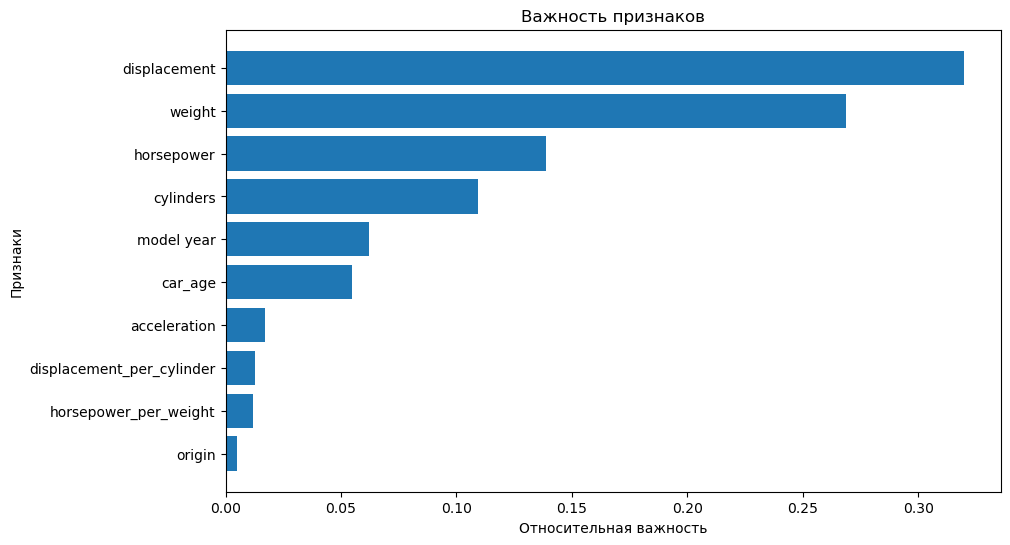

In [27]:
importances = best_rf_model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title('Важность признаков')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Относительная важность')
plt.ylabel('Признаки')
plt.show()

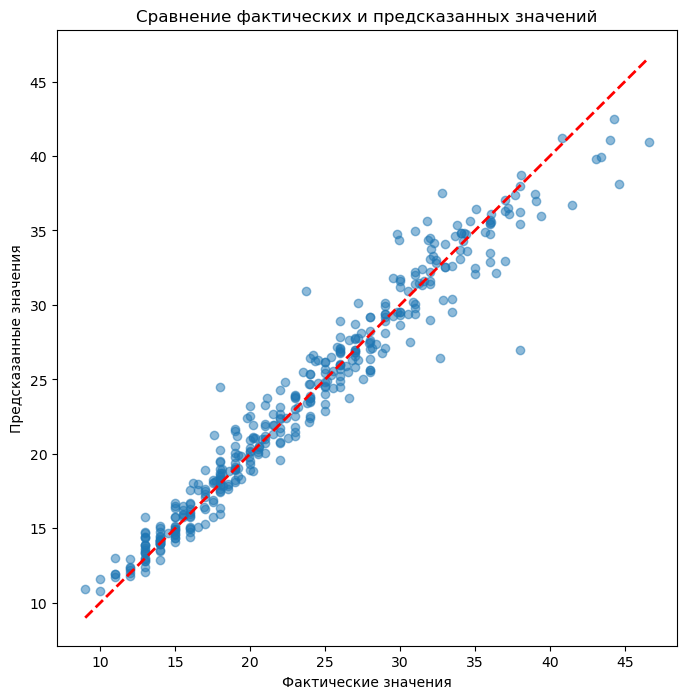

In [28]:
plt.figure(figsize=(8, 8))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Сравнение фактических и предсказанных значений')
plt.show()

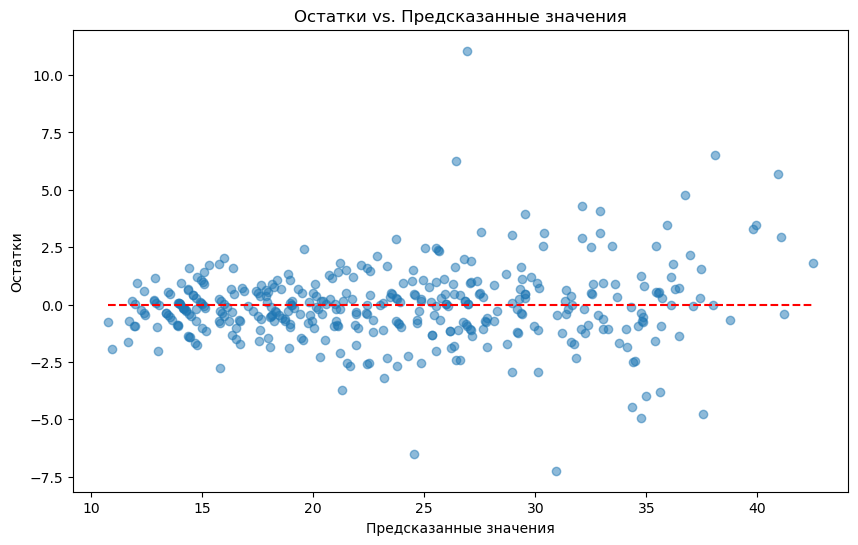

In [29]:
residuals = y - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='r', linestyles='dashed')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('Остатки vs. Предсказанные значения')
plt.show()

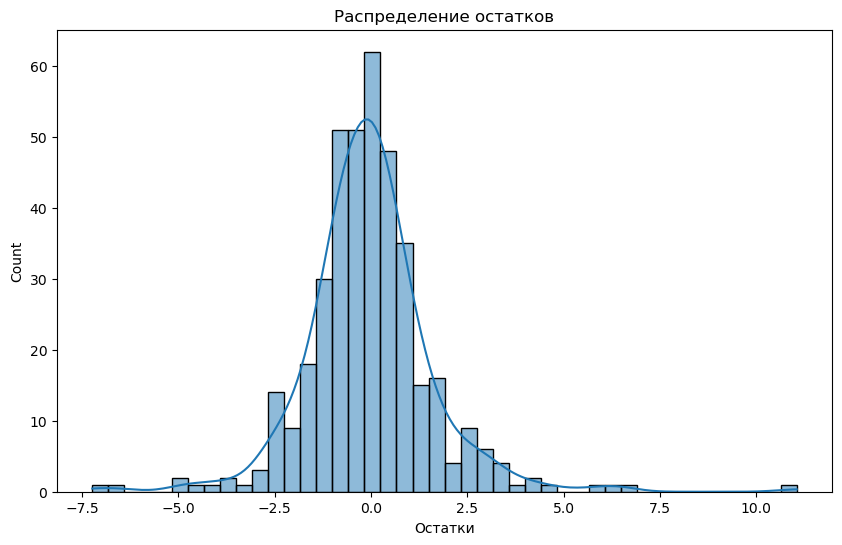

In [30]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Остатки')
plt.title('Распределение остатков')
plt.show()